In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [3]:
df= pd.read_csv('/Users/gregorygibbs/Documents/gait_data1.csv')
column_to_move = 'Diagnosis'

df = pd.concat([df.drop(columns=['Diagnosis']), df['Diagnosis']], axis=1)
df

,Mean Velocity No Task (cm/sec),Mean Velocity Alphabet (cm/sec),Mean Cadence Serial Subtraction,Mean Velocity Serial Subtraction (cm/sec),Mean Cadence Texting (steps/min),Mean Velocity Texting (cm/sec),Alphabet % Change in Velocity,Serial subtraction % Change in Velocity,Texting % Change in Velocity,Festination index,...,Ellipse Major Axis (cm.),Ellipse Angle (degrees),Any change in diagnosis due to consensus?,Global Diagnosis,Diagnosis (Sub-Category),"If MCI, please select",Participant Gender,Current Age,Participant's Race,Diagnosis
0,124.822,122.183,104.348,117.467,101.250,98.865,2.114211,5.892391,20.795212,0.014649,...,35.851,-21.928,NaN,1.0,12.0,NaN,1.0,72,1.0,1.0
1,143.825,128.803,112.878,132.167,102.037,107.019,10.444638,8.105684,25.590822,0.013824,...,29.132,9.647,NaN,1.0,11.0,NaN,2.0,69,1.0,1.0
2,151.682,128.702,104.159,115.401,114.741,128.475,15.150117,23.919120,15.299772,0.013107,...,NaN,NaN,NaN,1.0,11.0,NaN,2.0,47,1.0,1.0
3,95.809,107.170,90.282,84.276,92.415,77.149,-11.857967,12.037491,19.476250,0.016576,...,26.146,0.644,NaN,2.0,26.0,NaN,2.0,45,2.0,2.0
4,124.444,118.114,105.014,107.133,80.623,64.906,5.086625,13.910675,47.843207,0.015491,...,NaN,-26.366,1.0,2.0,21.0,21.0,2.0,83,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,126.947,125.248,114.073,119.173,106.031,94.380,1.338354,6.123815,25.654013,0.015185,...,33.024,8.614,NaN,1.0,11.0,NaN,2.0,58,1.0,1.0
150,120.730,106.696,101.857,110.123,96.644,94.848,11.624286,8.785720,21.437919,0.015125,...,NaN,NaN,NaN,1.0,12.0,NaN,2.0,69,1.0,1.0
151,131.731,132.318,107.063,122.046,86.475,67.974,-0.445605,7.352104,48.399390,0.014145,...,30.542,-3.509,NaN,1.0,12.0,NaN,1.0,73,1.0,1.0
152,148.416,144.638,108.108,131.402,95.327,99.662,2.545548,11.463724,32.849558,0.012993,...,34.290,2.086,NaN,1.0,12.0,NaN,2.0,61,1.0,1.0


In [4]:
variables = df.columns

# Display the list of variables
print("List of Variables:")
print(variables)



List of Variables:
Index(['Mean Velocity No Task (cm/sec) ', 'Mean Velocity Alphabet (cm/sec) ',
       'Mean Cadence Serial Subtraction   ',
       'Mean Velocity Serial Subtraction (cm/sec) ',
       'Mean Cadence Texting (steps/min) ', 'Mean Velocity Texting (cm/sec) ',
       'Alphabet % Change in Velocity ',
       'Serial subtraction % Change in Velocity ',
       'Texting % Change in Velocity ', 'Festination index',
       'Alphabet % Change in Cadence ', 'Texting % Change in Cadence',
       'Serial Subtraction % Change in Cadence', 'Mean Cadence No Task',
       'Mean eGVI No Task', 'Mean Cadence Alphabet ', 'Mean eGVI Alphabet ',
       'Mean eGVI Serial Subtraction', 'Mean eGVI Texting ',
       'Mean Step Length No Task  (cm)', 'Mean Step Length Alphabet (cm)',
       'Mean Step Length Serial Subtraction', 'Mean Step Length Texting',
       'Mean Stride Width No Task ', 'Mean Stride Width Alphabet ',
       'Mean Stride Width Serial Subtraction ', 'Mean Stride Width Texting

In [5]:
#Remove all unnecesary columns 
columns_to_drop = ['Global Diagnosis', 'Diagnosis (Sub-Category)','If MCI, please select','Any change in diagnosis due to consensus?']

df2 = df.drop(columns=columns_to_drop)
#Remove all Blank Diagnosis values 
df2.dropna(subset=['Diagnosis'], inplace=True)
df2


,Mean Velocity No Task (cm/sec),Mean Velocity Alphabet (cm/sec),Mean Cadence Serial Subtraction,Mean Velocity Serial Subtraction (cm/sec),Mean Cadence Texting (steps/min),Mean Velocity Texting (cm/sec),Alphabet % Change in Velocity,Serial subtraction % Change in Velocity,Texting % Change in Velocity,Festination index,...,Ellipse Center ML Axis (cm),Ellipse Center AP Axis (cm),Ellipse Area (cm x cm),Ellipse Minor Axis (cm.),Ellipse Major Axis (cm.),Ellipse Angle (degrees),Participant Gender,Current Age,Participant's Race,Diagnosis
0,124.822,122.183,104.348,117.467,101.250,98.865,2.114211,5.892391,20.795212,0.014649,...,-2.804,2.086,572.396,20.328,35.851,-21.928,1.0,72,1.0,1.0
1,143.825,128.803,112.878,132.167,102.037,107.019,10.444638,8.105684,25.590822,0.013824,...,0.384,1.066,344.761,15.068,29.132,9.647,2.0,69,1.0,1.0
2,151.682,128.702,104.159,115.401,114.741,128.475,15.150117,23.919120,15.299772,0.013107,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,47,1.0,1.0
3,95.809,107.170,90.282,84.276,92.415,77.149,-11.857967,12.037491,19.476250,0.016576,...,5.206,-2.835,239.867,11.681,26.146,0.644,2.0,45,2.0,2.0
4,124.444,118.114,105.014,107.133,80.623,64.906,5.086625,13.910675,47.843207,0.015491,...,NaN,NaN,54.223,NaN,NaN,-26.366,2.0,83,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,126.947,125.248,114.073,119.173,106.031,94.380,1.338354,6.123815,25.654013,0.015185,...,1.330,0.711,434.888,16.767,33.024,8.614,2.0,58,1.0,1.0
150,120.730,106.696,101.857,110.123,96.644,94.848,11.624286,8.785720,21.437919,0.015125,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,69,1.0,1.0
151,131.731,132.318,107.063,122.046,86.475,67.974,-0.445605,7.352104,48.399390,0.014145,...,1.381,1.668,379.502,15.821,30.542,-3.509,1.0,73,1.0,1.0
152,148.416,144.638,108.108,131.402,95.327,99.662,2.545548,11.463724,32.849558,0.012993,...,0.421,1.358,534.577,19.850,34.290,2.086,2.0,61,1.0,1.0


In [6]:
column_means = df.mean()

# Impute missing values with the mean of each column
df3 = df2.fillna(column_means)
df3 = df3.replace(to_replace=['10-041'],value='10.041')
df3



,Mean Velocity No Task (cm/sec),Mean Velocity Alphabet (cm/sec),Mean Cadence Serial Subtraction,Mean Velocity Serial Subtraction (cm/sec),Mean Cadence Texting (steps/min),Mean Velocity Texting (cm/sec),Alphabet % Change in Velocity,Serial subtraction % Change in Velocity,Texting % Change in Velocity,Festination index,...,Ellipse Center ML Axis (cm),Ellipse Center AP Axis (cm),Ellipse Area (cm x cm),Ellipse Minor Axis (cm.),Ellipse Major Axis (cm.),Ellipse Angle (degrees),Participant Gender,Current Age,Participant's Race,Diagnosis
0,124.822,122.183,104.348,117.467,101.250,98.865,2.114211,5.892391,20.795212,0.014649,...,-2.804000,2.086000,572.396000,20.328000,35.851000,-21.928000,1.0,72,1.0,1.0
1,143.825,128.803,112.878,132.167,102.037,107.019,10.444638,8.105684,25.590822,0.013824,...,0.384000,1.066000,344.761000,15.068000,29.132000,9.647000,2.0,69,1.0,1.0
2,151.682,128.702,104.159,115.401,114.741,128.475,15.150117,23.919120,15.299772,0.013107,...,0.042325,0.885103,310.829105,14.397564,25.339368,1.784597,2.0,47,1.0,1.0
3,95.809,107.170,90.282,84.276,92.415,77.149,-11.857967,12.037491,19.476250,0.016576,...,5.206000,-2.835000,239.867000,11.681000,26.146000,0.644000,2.0,45,2.0,2.0
4,124.444,118.114,105.014,107.133,80.623,64.906,5.086625,13.910675,47.843207,0.015491,...,0.042325,0.885103,54.223000,14.397564,25.339368,-26.366000,2.0,83,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,126.947,125.248,114.073,119.173,106.031,94.380,1.338354,6.123815,25.654013,0.015185,...,1.330000,0.711000,434.888000,16.767000,33.024000,8.614000,2.0,58,1.0,1.0
150,120.730,106.696,101.857,110.123,96.644,94.848,11.624286,8.785720,21.437919,0.015125,...,0.042325,0.885103,310.829105,14.397564,25.339368,1.784597,2.0,69,1.0,1.0
151,131.731,132.318,107.063,122.046,86.475,67.974,-0.445605,7.352104,48.399390,0.014145,...,1.381000,1.668000,379.502000,15.821000,30.542000,-3.509000,1.0,73,1.0,1.0
152,148.416,144.638,108.108,131.402,95.327,99.662,2.545548,11.463724,32.849558,0.012993,...,0.421000,1.358000,534.577000,19.850000,34.290000,2.086000,2.0,61,1.0,1.0


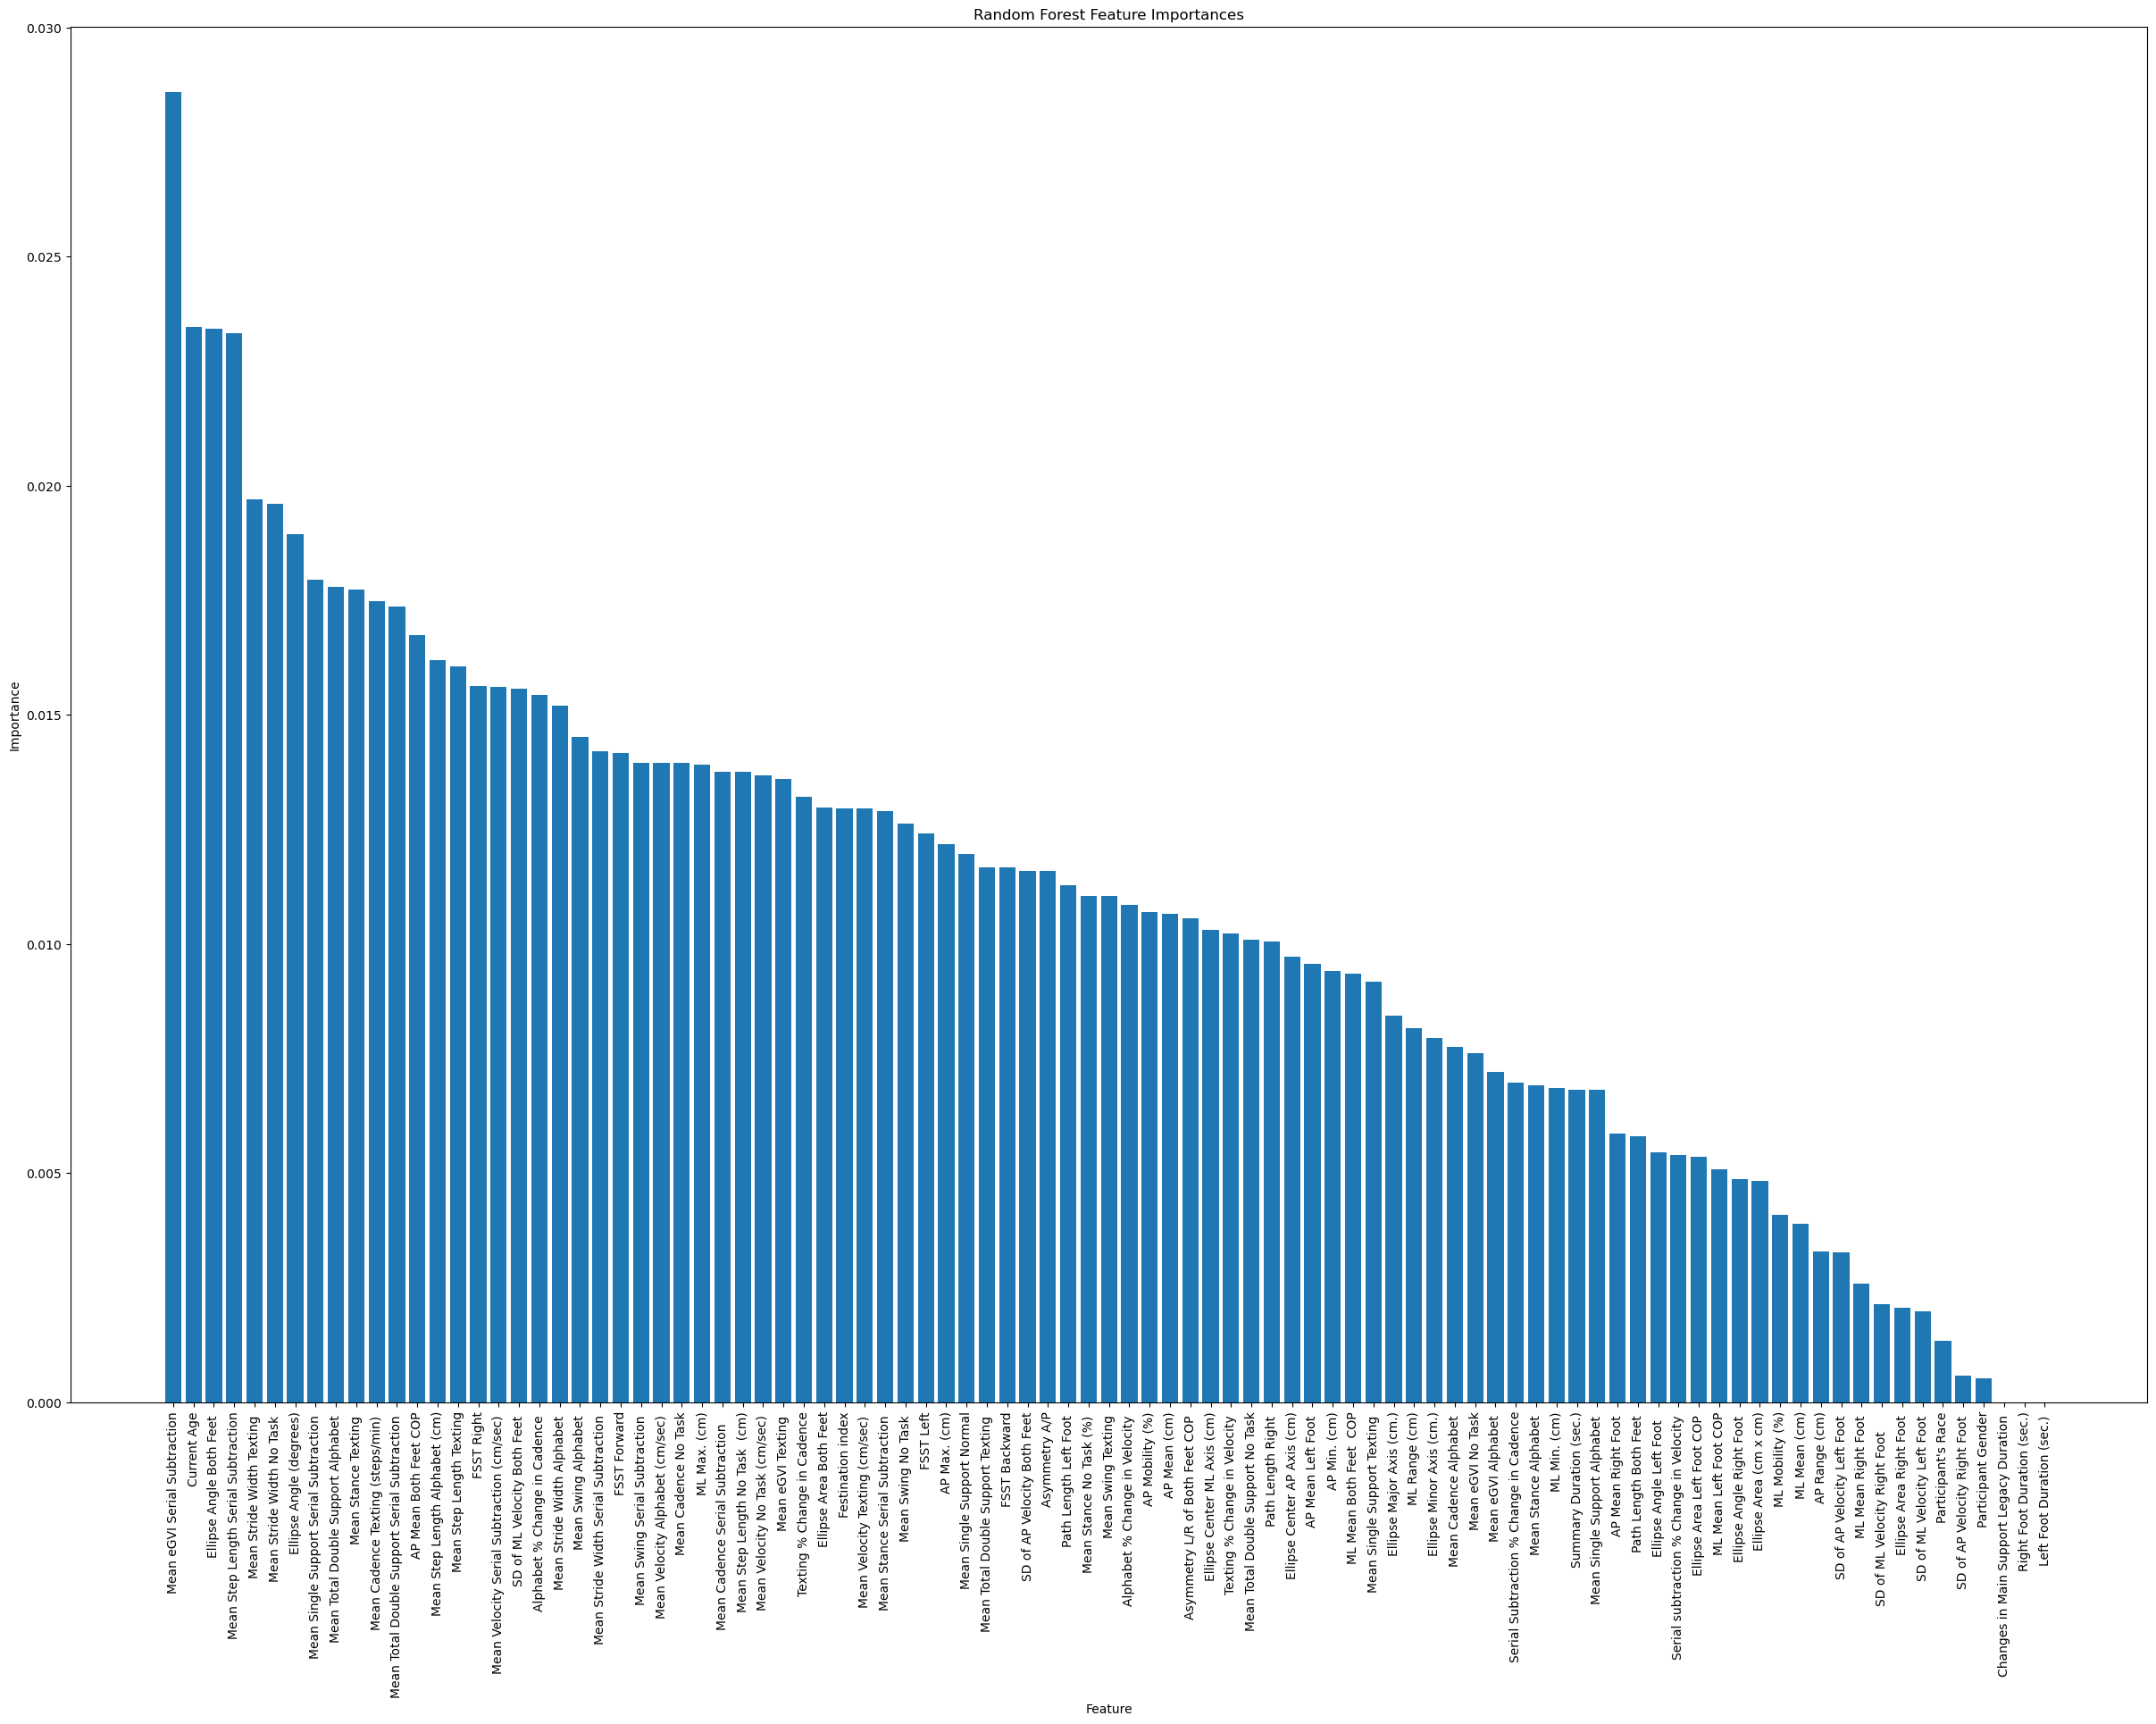

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with features (X) and target variable (y)
# X is the feature matrix, and y is the target variable

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3.drop('Diagnosis', axis=1), df3['Diagnosis'], test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Access feature importances
feature_importances = rf_classifier.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(30, 20))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances")
plt.savefig('featimp.pdf')
plt.show()
#plt.savefig('features.pdf')